<h1><span style="color:lightgreen">Pivot table</h1></span>
<h4><span style="color:lightgreen">Instructions:</h4></span>
Using the data from the <a>product_prices_cleaned.csv</a> file do the following:

- Create a pivot table so that the rows hold years, and columns have names of goods. Use the average price of the product as the value.
- Using lambda and pivot_table, recreate the view of the data discussed during the lecture. Analyse the result of the recreation. What can you say about what was passed to the function?
- Using pivot_table, see how the mean and median prices in the product groups were shaped across years (many functions can be passed as a list).


<h4>Subsection 2 hint:</h4>
Code from the lecture:<br>
<a>pd.pivot(data=df, index=['province', 'product'], columns=['date'], values=['value'])<a>



In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

data = pd.read_csv('C:\\Users\\MartinPC\\Desktop\\Kuba kurz\\01_Data\\product_prices_cleaned.csv', sep=';')

print(data.head())

            province product_types currency  product_group_id  \
0       SUBCARPATHIA           NaN      PLN                 2   
1               ŁÓDŹ           NaN      PLN                 4   
2  KUYAVIA-POMERANIA           NaN      PLN                 2   
3      LOWER SILESIA           NaN      PLN                 2   
4     WARMIA-MASURIA           NaN      PLN                 2   

                      product_line  value     date  \
0        pork ham cooked - per 1kg  21.37   2013-3   
1                  bread - per 1kg    NaN   2018-2   
2  barley groats sausage - per 1kg   3.55  2019-12   
3       dressed chickens - per 1kg   6.14   2019-2   
4    Italian head cheese - per 1kg   5.63   2002-3   

                           product  
0        pork ham cooked - per 1kg  
1                  bread - per 1kg  
2  barley groats sausage - per 1kg  
3       dressed chickens - per 1kg  
4    Italian head cheese - per 1kg  


In [8]:
data = data.drop_duplicates()
data['product_types'] = data['product_types'].fillna('Non available')
data = data.dropna()
print(data)


                 province  product_types currency  product_group_id  \
0            SUBCARPATHIA  Non available      PLN                 2   
2       KUYAVIA-POMERANIA  Non available      PLN                 2   
3           LOWER SILESIA  Non available      PLN                 2   
4          WARMIA-MASURIA  Non available      PLN                 2   
7                  POLAND  Non available      PLN                 2   
...                   ...            ...      ...               ...   
128497            MASOVIA  Non available      PLN                 2   
128498            SILESIA  Non available      PLN                 2   
128499            SILESIA  Non available      PLN                 2   
128500  KUYAVIA-POMERANIA  Non available      PLN                 2   
128502     WARMIA-MASURIA  Non available      PLN                 2   

                                 product_line  value     date  \
0                   pork ham cooked - per 1kg  21.37   2013-3   
2             bar

In [ ]:
data = pd.read_csv('C:\\Users\\MartinPC\\Desktop\\Kuba kurz\\01_Data\\product_prices_cleaned.csv', sep=';')

# Počet řádků před odstraněním duplicit a chybějících hodnot
initial_row_count = len(data)

# Odstranění duplicitních řádků
data = data.drop_duplicates()

# Počet řádků po úpravách
final_row_count = len(data)

# Spočítání, kolik řádků bylo odstraněno
removed_rows = initial_row_count - final_row_count

print(f"Počet odstraněných řádků: {removed_rows}")

print(data)

In [13]:
print(data.columns.tolist())

['province', 'product_types', 'currency', 'product_group_id', 'product_line', 'value', 'date', 'product', 'year']


In [19]:
# data['date].astype(str) - převede sloupec data na stringy.. 
# .str[0] - po rozdělení stringu na dvě hodnoty, které mohou být rozděleny '-' se vezme jen první hodnota
data['year'] = data['date'].astype(str).str.split('-').str[0]

# Vytvoření pivotní tabulky
pivot_table = data.pivot_table(index='year', columns='product', values='value', aggfunc='mean')

# Zobrazení pivotní tabulky
print(len(data))

128503


***created pivot table with just year row and average value of name colmn 'value'***

In [25]:
data['year'] = data['date'].astype(str).str.split('-').str[0]

# Skupina podle roku a výpočet průměrné hodnoty pro každý rok
# Funkce mean() automaticky provádí výpočet průměru
average_values_per_year = data.groupby('year')['value'].mean().reset_index()

# Výpis průměrných hodnot pro každý rok
print(average_values_per_year)

    year     value
0   1999  5.177460
1   2000  5.539797
2   2001  5.666311
3   2002  5.376308
4   2003  5.493392
5   2004  5.960060
6   2005  6.024055
7   2006  6.126451
8   2007  6.385495
9   2008  6.832218
10  2009  7.053836
11  2010  7.158866
12  2011  7.745051
13  2012  8.247278
14  2013  8.330380
15  2014  8.220567
16  2015  8.187792
17  2016  8.423526
18  2017  8.575474
19  2018  8.760664
20  2019  7.317223


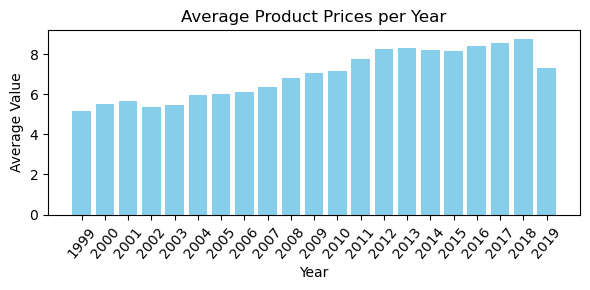

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.bar(average_values_per_year['year'], average_values_per_year['value'], color='skyblue')

# Přidání názvů a titulků
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Product Prices per Year')
plt.xticks(rotation=50)  # vyrotování osy X pro lepší čitelnost let
plt.tight_layout()

# Zobrazení grafu
plt.show()